In [31]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Further Cleanup: job_Skills to list datatype
df['job_skills'] = df['job_skills'].apply(lambda y: ast.literal_eval(y) if pd.notna(y) else y)

# Filtering for Data Analyst Jobs
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [ ]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

"df_DA_explode = df_DA.explode('job_skills')\ndf_DA_exploded = df_DA_explode.to_frame()\ndf_DA_exploded.pivot_table(index='job_posted_month_no',\n                          columns='job_skills',\n                          aggfunc='size',\n                          fill_value=0)\ndf_DA_pivot.loc['Total'] = df_DA_pivot.sum()\ndf_DA_pivot.loc['Total'].sort_values(ascending=False)\ndf_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]\ndf_DA_pivot = df_DA_pivot.drop('Total')\n\nrange = 5\n\ndf_DA_pivot.iloc[:, :range].plot(kind='line')\nplt.title(f'Top {range} Skills for Data Analysts per Month')\nplt.xlabel('Month Number')\nplt.ylabel('Skill Count')\nplt.show()"

In [36]:
df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']...",12
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau...",10
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']},10
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']},2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ...",1
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None,3
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}",3


In [37]:
df_DA.explode('job_skills')

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3


In [38]:
df_DA_exploded = df_DA.explode('job_skills')

In [39]:
df_DA_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3


In [40]:
df_DA_exploded.pivot_table(index='job_posted_month_no',
                          columns='job_skills',
                          aggfunc='size',
                          fill_value=0)

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [41]:
df_DA_pivot = df_DA_exploded.pivot_table(index='job_posted_month_no',
                          columns='job_skills',
                          aggfunc='size',
                          fill_value=0)

In [43]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

In [44]:
df_DA_pivot.loc['Total'].sort_values(ascending=False)

job_skills
sql          92428
excel        66860
python       57190
tableau      46455
power bi     39380
             ...  
esquisse         1
suse             1
capacitor        1
chainer          1
msaccess         1
Name: Total, Length: 235, dtype: int64

In [45]:
df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

In [47]:
df_DA_pivot = df_DA_pivot.drop('Total')

# **Having already done this in our explode() exercise, let's customize the plot further**

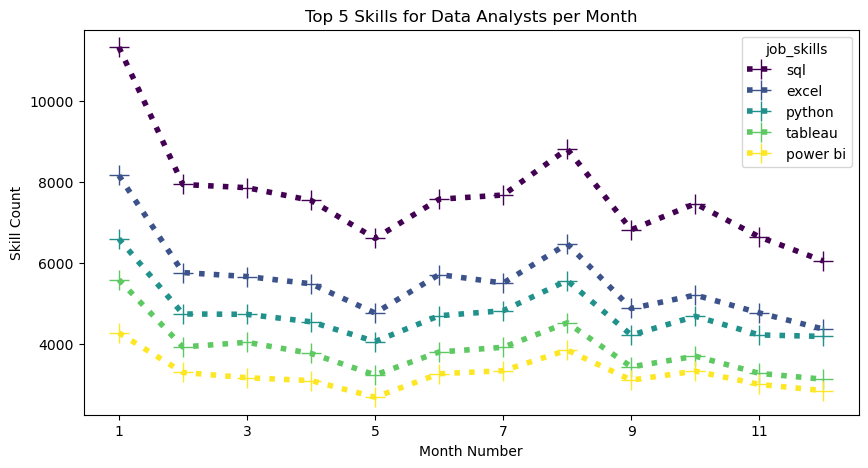

In [72]:
range = 5

df_DA_pivot.iloc[:, :range].plot(
                                kind='line',
                                linewidth=4,
                                linestyle=':',      # Other Options: '-', ':', '-.'
                                colormap='viridis', # Other Options: 'plasma', 'inferno', 'magma', 'cividis' visit matplotlib.org/cheatsheets for more 
                                marker='+',         # Other Options: 'x', '+', '*', 's', ',', '.', '1', '2', '3', ...
                                markersize=15,
                                figsize=(10,5)
                                )
plt.title(f'Top {range} Skills for Data Analysts per Month')
plt.xlabel('Month Number')
plt.ylabel('Skill Count')
plt.show()

# **Customizing the Scatter Plot from last Exercise**

In [77]:
df_exploded = df.explode('job_skills').copy()

df_DA_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3


In [78]:
skill_stats = df_exploded.groupby('job_skills').agg(
                                                    median_salary=(
                                                                    'salary_year_avg',
                                                                    'median'
                                                                    ),
                                                    skill_count=('job_skills',
                                                                 'count'
                                                                 )
)

skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

skill_stats

,median_salary,skill_count
job_skills,,
sql,120000.0,384849
python,125000.0,380909
aws,135000.0,145381
azure,125000.0,132527
r,119550.0,130892
tableau,111175.0,127213
excel,92500.0,127018
spark,140000.0,114609
power bi,102000.0,98147


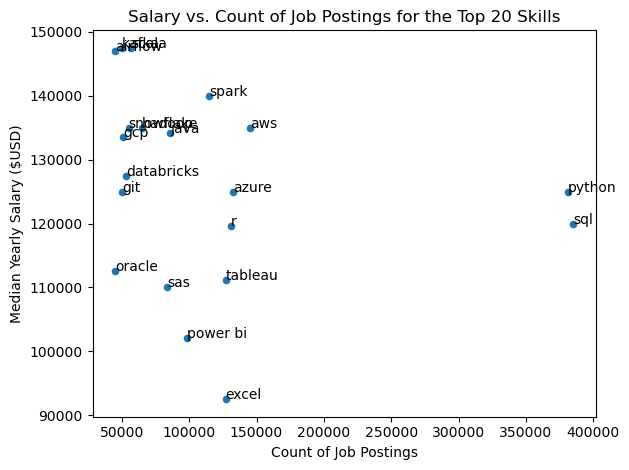

In [79]:
skill_stats.plot(
                kind='scatter',
                x='skill_count',
                y='median_salary'
                )

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.title(f'Salary vs. Count of Job Postings for the Top {skill_count} Skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.tight_layout()
plt.show()

# **We need to adjust the text label to accomodate more data entry on the scatter plot**

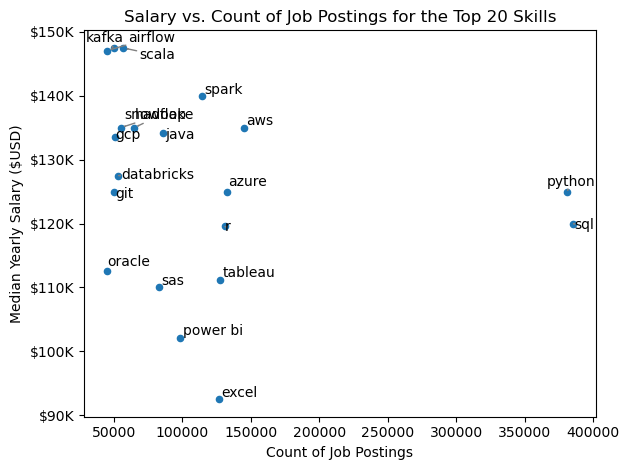

In [86]:
from adjustText import adjust_text

skill_stats.plot(
                kind='scatter',
                x='skill_count',
                y='median_salary'
                )
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)) # Into texts as defined in order to adjust

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))

plt.title(f'Salary vs. Count of Job Postings for the Top {skill_count} Skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.ylim()
plt.tight_layout()
plt.show()